Lab 4 Collisions and conservation of Momentum. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy 
import scipy

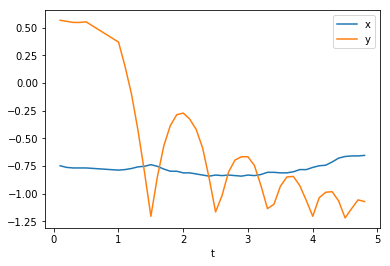

In [3]:
ball = pd.read_csv("bouncing_ball.csv") #Imports my csv file
ball.plot('t') #plots my y (vertical position) and x (horizontial position) data against the variable t (time)

Now I am going to select a certain section of the data to analyze. I am going to choose before and after the first bounce to start, as I think that will most likely have the largest data range to analyze. 

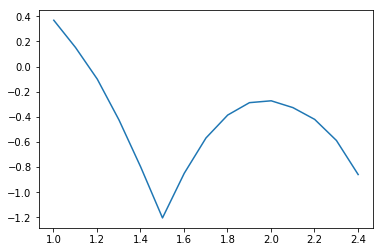

In [4]:
tt = range(5, 20)
yNew = ball.loc[tt,'y' ]
tNew = ball.loc[tt,'t']
plt.plot(tNew, yNew)

[]

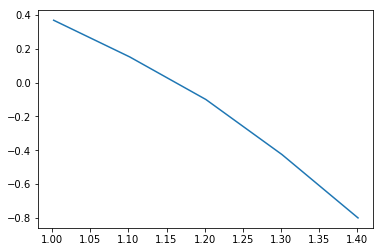

In [5]:
tt1 = range(5,10) #Choosing by eye what parts I want to analyse 
y1 = ball.loc[tt1,'y' ]
t1 = ball.loc[tt1,'t']
plt.plot(t1, y1)

v1 = y1.diff()
plt.plot()

Then this is the data from the ISS equal masses side collision where each ball is set to be 1kg. 

           t     v_{x}    v_{x1}
0   0.000000       NaN       NaN
1   0.066733 -0.000146  0.356889
2   0.133467 -0.000284  0.360140
3   0.200200  0.000205  0.361509
4   0.266934  0.000625  0.366575
5   0.333667  0.000462  0.366677
6   0.400400  0.000018  0.368034
7   0.467134  0.000008  0.374438
8   0.533867  0.068439  0.371899
9   0.600601  0.257502  0.141777
10  0.667334  0.390540 -0.042877
11  0.734067  0.402785 -0.000406
12  0.800801  0.405933 -0.000722
13  0.867534  0.405781 -0.000929
14  0.934268  0.408305 -0.000905
15  1.001001  0.407086 -0.001535
16  1.067734  0.406895 -0.002557
17  1.134468  0.405956 -0.004490
18  1.201201  0.406084 -0.003468
19  1.267935  0.405956  0.000059
20  1.334668       NaN       NaN


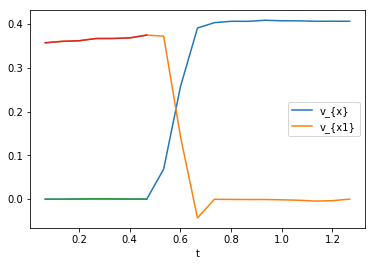

In [40]:
iss = pd.read_csv("issMasses", delim_whitespace=True)  #Imports my csv file, but this one used a backslash as the seperatror, hence the odd format at the end.
iss.plot('t') 
print(iss)




tt = range(0, 8) #Defining the section of before the collision 
v_1a = iss.loc[tt,'v_{x}']
t_1 = iss.loc[tt,'t']

plt.plot(t_1,v_1a)  #green on the plot is the new part to be analyzed

v_1b = iss.loc[tt,'v_{x1}']
#t_1b = iss.loc[tt,'t'] #Uncessary 

plt.plot(t_1,v_1)  #red on the plot is the new part to be analyzed


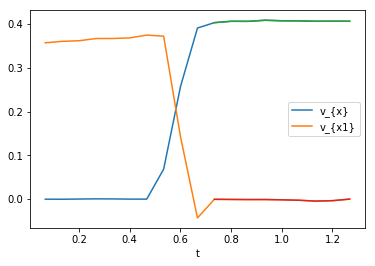

In [41]:
iss.plot('t') 
#print(iss.iloc[0])

tt = range(11, 20)  #Defining the section of the data after collision. 
v_2a = iss.loc[tt,'v_{x}']
t_2 = iss.loc[tt,'t']

plt.plot(t_2,v_2a)  #green on the plot is the new part to be analyzed

v_2b = iss.loc[tt,'v_{x1}']
#t_2b = iss.loc[tt,'t'] # Uncessary

plt.plot(t_2,v_2b)  #red on the plot is the new part to be analyzed

In [63]:
p_1a = v_1a * 1 #kg mass times velocity for stationary ball in the first part. 
p_1b = v_1b * 1
p_2a = v_2a * 1
p_2b = v_2b * 1

p_1 = p_1a + p_1b
p_2 = p_2a + p_2b

1    0.066733
2    0.133467
3    0.200200
4    0.266934
5    0.333667
6    0.400400
7    0.467134
Name: t, dtype: float64
0         NaN
1    0.356743
2    0.359856
3    0.361713
4    0.367199
5    0.367139
6    0.368053
7    0.374446
dtype: float64


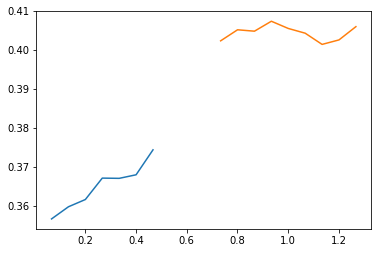

In [74]:
plt.plot(t_1, p_1)
plt.plot(t_2, p_2)

print(t_1.loc[range(1,8)])
print(p_1)

 
0.0401 x + 0.3543


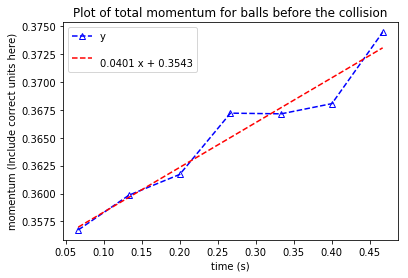

In [79]:
p_1.dropna(inplace=True) #Have to remove the Nan's otherwise I get error "SVD did not converge in Lnear Least Squares" when I use the polyfit function

t_1 = t_1.loc[range(1,8)]
p_1 = p_1.loc[range(1,8)]


line = numpy.polyfit(t_1.loc[range(1,8)],p_1.loc[range(1,8)],1)

p = numpy.poly1d(line) #Do this to convert it into a usable form for plotting


fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_1,p_1, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_1, p(t_1), c = 'r', ls = '--', label= p) #plotting the linear formula

#plt.text(2, 0.65, 'y = {} x + {}'.format(m, b)

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Plot of total momentum for balls before the collision")
ax.set_xlabel('time (s)')
ax.set_ylabel('momentum (Include correct units here)')
print(p) #So you can see the form of the polynomial that was fitted. In this case it is y = mx + b

